In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import cmath
from numpy import *
from numpy.linalg import inv
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io import wavfile
from IPython.display import Audio
from scipy.io.wavfile import write

### Reading the audio file

Audio Type: int16
Samples = 22073   Channels = 2
Sampling frequency = 44100 Hz
Audio length: 501 mili-seconds


Text(0,0.5,'Amplitude')

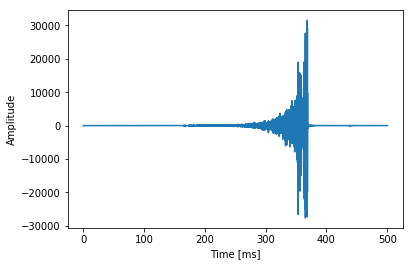

In [2]:
fs, audio = wavfile.read('audio.wav')
Audio('audio.wav')
print(f"Audio Type: {audio.dtype}")
print(f"Samples = {audio.shape[0]}   Channels = {audio.shape[1]}")
print(f"Sampling frequency = {fs} Hz")

audio = audio.T[0]
samples = audio.shape[0]
L = (samples / fs)*1000
print(f'Audio length: {L:.0f} mili-seconds')

f, ax = plt.subplots()
ax.plot((np.arange(samples) / fs)*1000, audio)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Amplitude')

### Compaction by dropping 4000 values from DCT array

In [5]:
X_dct = dct(audio)
M = 4000 
N = len(audio)
X_m_dct = X_dct[:(N-M)]
p = b = np.array([N, M]) 
filename = "dct.txt"
with open(filename,"w") as f:
    f.write("\n".join(" ".join(map(str, x)) for x in (X_m_dct,p)))
    f.close()

### Reading from file and reconstructing the signal

In [9]:
filename = "dct.txt"
list_of_lists = []
with open(filename,"r") as f:
    for line in f:
        inner_list = [float(elt.strip()) for elt in line.split(' ')]
        list_of_lists.append(inner_list)
dct_m_retrived = list_of_lists[0]
N = int(list_of_lists[1][0])
M = int(list_of_lists[1][1])
#Zero padding
for i in range(N-M,N):
    dct_m_retrived.append(0)
#inverse DCT
x_m = idct(dct_m_retrived)/(2*len(dct_m_retrived))

### Comparing the results

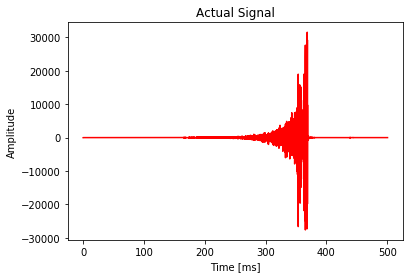

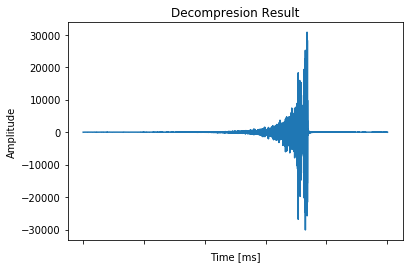

In [10]:
plt.figure(1)
plt.plot((np.arange(samples) / fs)*1000, audio,'r')
plt.title('Actual Signal')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.figure(2)
plt.plot((np.arange(samples) / fs)*1000, x_m)
plt.title('Decompresion Result')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
ax = plt.gca()
ax.set_xticklabels([])
plt.show()